<a href="https://colab.research.google.com/github/CAMI2-bit/Ecuaciones-diferenciales-parciales/blob/main/SERIES_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

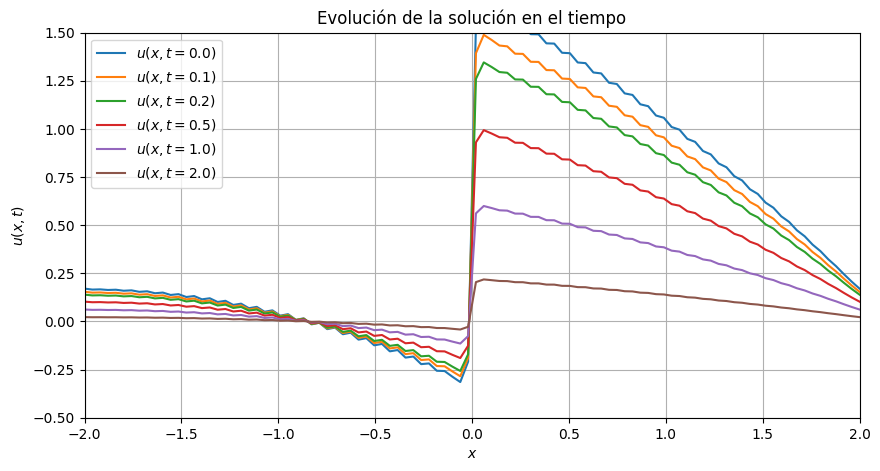

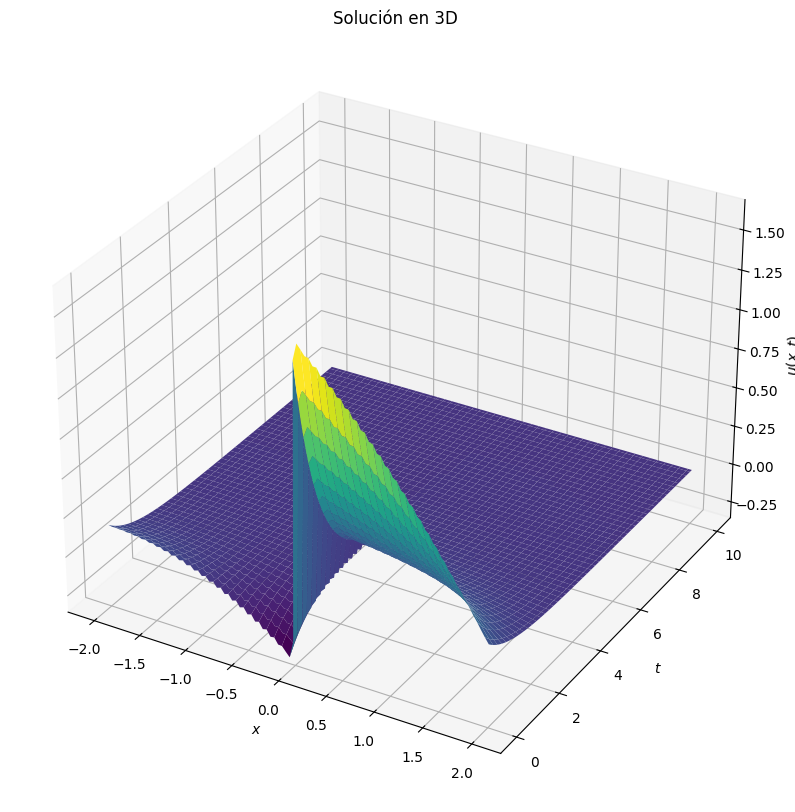

In [1]:

# Importamos las librerías necesarias
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

# Definimos la serie de Fourier truncada con N términos
def fourier_series(x, N=20):
    f = 0.5  # Término a_0/2
    for n in range(1, N+1):
        an = (2 * (-1)**(n-1)) / (n**2 * pi**2)
        bn = (2 / (n * pi))
        f += an * cos(n * pi * x / 2) + bn * sin(n * pi * x / 2)
    return f

# Definimos la función con dependencia temporal
def fourier_series_time(x, t, N=50):
    f = zeros((len(x), len(t)))
    for i in range(len(t)):
        f[:, i] = fourier_series(x, N) * exp(-t[i])  # Agregamos decaimiento exponencial
    return f

# Definimos el dominio de x y el tiempo
x = linspace(-2, 2, 100)
t = linspace(0, 10, 100)

# Aproximación de la serie para diferentes tiempos
U = fourier_series_time(x, t, N=50)

# Graficamos la evolución de la función en diferentes tiempos
figure(figsize=(10,5))
for i in [0, 1, 2, 5, 10, 20]:
    plot(x, U[:, i], label=f'$u(x,t={t[i]:.1f})$')

xlabel('$x$')
ylabel('$u(x,t)$')
title('Evolución de la solución en el tiempo')
legend()
grid()
xlim(-2, 2)
ylim(-0.5, 1.5)
show()

# Gráfica en 3D
fig = figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

X, T = meshgrid(x, t)
U = fourier_series_time(x, t, N=50)

ax.plot_surface(X, T, U.T, cmap='viridis')

ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.set_zlabel('$u(x,t)$')
ax.set_title('Solución en 3D')

show()